In [26]:
%matplotlib inline
#%matplotlib osx
from matplotlib import pyplot as plt
import numpy as np
import math

## System of Non-Linear Equations.

Consider
$$x^2 + xy = 10$$
$$y + 3 xy^2 = 57$$

1) Write it in the form of
$$u(x,y) = 0$$
$$v(x,y) = 0$$

In [27]:
def u(x, y):
    return x**2 + x*y - 10
def v(x, y):
    return y + 3*x*y**2 - 57

2) Let us visualize it by making 3d plot. Despite looking really cool it doesn't tell much.

Text(0.5, 0.92, 'v(x,y)')

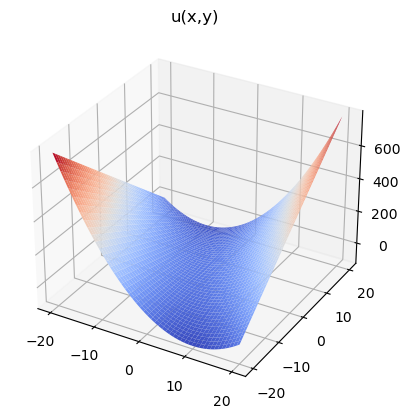

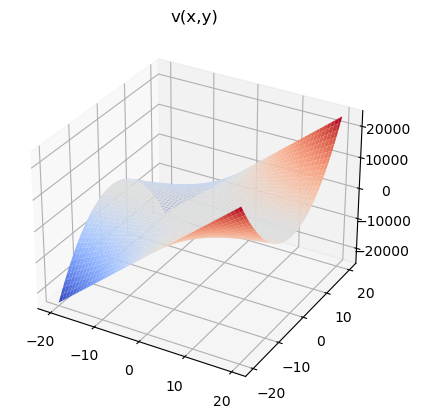

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy) ##<<<<<<And this too.   

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('u(x,y)')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')        
ucs = ax.plot_surface(xgrid, ygrid, vz, cmap=cm.coolwarm)
plt.title('v(x,y)')

3) Contour plot.

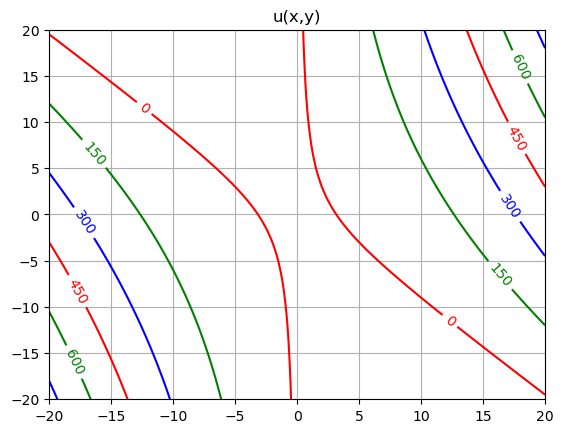

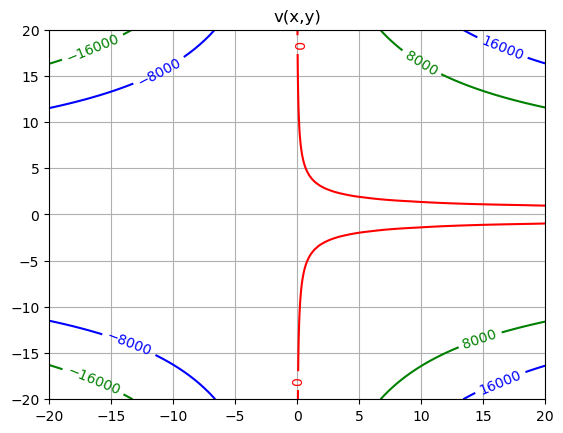

In [29]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 100
ny = 100
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)
 

ucs = plt.contour(x, y, uz, colors=('b','r','g'))
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('u(x,y)')

plt.figure()
vcs = plt.contour(x, y, vz, colors=('b','r','g'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y)')
plt.grid()

3) Which lines are we interested in?

In [ ]:
intersection of the zero lines of both plots is the solution to the system of equations

4. Let's overlay them on top of each other.

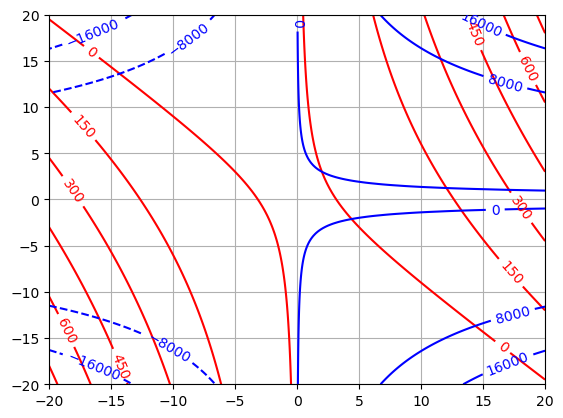

In [7]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

5) Where (approximately) are the solutions to $u(x,y)=0$ and $v(x,y)=0$

### Recall: Newton's Method in 1D

Let's quickly review how we find the root of a single non-linear equation, $f(x) = 0$.

The Idea:

1) Start with an initial guess, $x_n$.

2) Find the tangent line to the function at $x_n$.

3) The root of this tangent line, $x_{n+1}$, is our next (and hopefully better) guess.

Repeat.

The Derivation (via Taylor Series):
We want to find a small step, $\Delta x$, such that $f(x_n + \Delta x) = 0$.
We can approximate $f(x)$ near $x_n$ using a first-order Taylor expansion:

$$f(x_n + \Delta x) \approx f(x_n) + f'(x_n) \Delta x$$

We want the left side to be zero. So, we set our approximation to zero and solve for the step $\Delta x$:

$$0 = f(x_n) + f'(x_n) \Delta x$$

$$f'(x_n) \Delta x = -f(x_n)$$

$$\Delta x = -\frac{f(x_n)}{f'(x_n)}$$

The Iterative Formula:
Our new guess, $x_{n+1}$, is the old guess plus this step: $x_{n+1} = x_n + \Delta x$.

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

This method is powerful because when it works, it converges quadratically—meaning the number of correct decimal places roughly doubles with each iteration. Its main weakness is its sensitivity to the initial guess.

 ### Newton's Method for 2D Systems

Now, let's move to 2D. We have two equations and two unknowns:

$$u(x, y) = 0$$

$$v(x, y) = 0$$

Vector Notation:
This is the key to keeping our sanity. Let's group our variables into a vector $\vec{x}$ and our functions into a vector $\vec{F}$:

$$\vec{x} = \begin{bmatrix} x \\ y \end{bmatrix} \qquad \vec{F}(\vec{x}) = \begin{bmatrix} u(x, y) \\ v(x, y) \end{bmatrix}$$

Our goal is to find the vector $\vec{x}$ such that $\vec{F}(\vec{x}) = \vec{0}$ (the zero vector).

The Derivation (Taylor Series in 2D):
Just like in 1D, we start at a guess $\vec{x}_n = \begin{bmatrix} x_n \\ y_n \end{bmatrix}$. We want to find a step vector $\Delta\vec{x} = \begin{bmatrix} \Delta x \\ \Delta y \end{bmatrix}$ such that $\vec{F}(\vec{x}_n + \Delta\vec{x}) = \vec{0}$.

Let's expand both functions, $u$ and $v$, using a multi-variable Taylor expansion, keeping only the first-order terms:

$$u(x_n + \Delta x, y_n + \Delta y) \approx u(x_n, y_n) + \frac{\partial u}{\partial x}\Delta x + \frac{\partial u}{\partial y}\Delta y$$

$$v(x_n + \Delta x, y_n + \Delta y) \approx v(x_n, y_n) + \frac{\partial v}{\partial x}\Delta x + \frac{\partial v}{\partial y}\Delta y$$

(All partial derivatives are evaluated at the point $(x_n, y_n)$).

We want the new point to be a root, so we set the left-hand sides to zero:

$$0 \approx u(x_n, y_n) + \frac{\partial u}{\partial x}\Delta x + \frac{\partial u}{\partial y}\Delta y$$

$$0 \approx v(x_n, y_n) + \frac{\partial v}{\partial x}\Delta x + \frac{\partial v}{\partial y}\Delta y$$

The "A-ha!" Moment: This is a Linear System!
Let's rearrange this. We want to solve for the unknowns $\Delta x$ and $\Delta y$.

$$\frac{\partial u}{\partial x}\Delta x + \frac{\partial u}{\partial y}\Delta y = -u(x_n, y_n)$$

$$\frac{\partial v}{\partial x}\Delta x + \frac{\partial v}{\partial y}\Delta y = -v(x_n, y_n)$$

This is just a 2x2 linear system! We can write this in matrix form:

$$\begin{bmatrix} \frac{\partial u}{\partial x} & \frac{\partial u}{\partial y} \\ \frac{\partial v}{\partial x} & \frac{\partial v}{\partial y} \end{bmatrix} \begin{bmatrix} \Delta x \\ \Delta y \end{bmatrix} = \begin{bmatrix} -u \\ -v \end{bmatrix}$$

The Jacobian Matrix:
This 2x2 matrix of partial derivatives is fundamental. It's the multi-variable equivalent of the derivative $f'(x)$. It's called the Jacobian matrix, $J$:

$$J(x, y) = \begin{bmatrix} \frac{\partial u}{\partial x} & \frac{\partial u}{\partial y} \\ \frac{\partial v}{\partial x} & \frac{\partial v}{\partial y} \end{bmatrix}$$



### Implementation

In [ ]:
import numpy as np

def partial_derivatives(u, v, x, y, h=1e-6):
    """Compute partial derivatives using central difference."""
    du_dx = (u(x + h, y) - u(x - h, y)) / (2 * h)
    du_dy = (u(x, y + h) - u(x, y - h)) / (2 * h)
    dv_dx = (v(x + h, y) - v(x - h, y)) / (2 * h)
    dv_dy = (v(x, y + h) - v(x, y - h)) / (2 * h)
    return du_dx, du_dy, dv_dx, dv_dy


def solve_delta(u, v, x, y):
    """Solve the 2×2 linear system for Δx, Δy."""
    du_dx, du_dy, dv_dx, dv_dy = partial_derivatives(u, v, x, y)
    J = np.array([[du_dx, du_dy],
                  [dv_dx, dv_dy]])
    rhs = np.array([-u(x, y), -v(x, y)])
    Δx, Δy = np.linalg.solve(J, rhs)
    return Δx, Δy, J


def newton_system(u, v, x0, y0, tol=1e-10, max_iter=20):
    """
    Newton's method for solving:
        u(x, y) = 0
        v(x, y) = 0
    """
    x, y = x0, y0

    for i in range(max_iter):
        Δx, Δy, J = solve_delta(u, v, x, y)
        x_new, y_new = x + Δx, y + Δy

        print(f"Iter {i+1:2d}: x = {x_new:.6f}, y = {y_new:.6f}")

        if np.sqrt(Δx**2 + Δy**2) < tol:
            print("\nConverged!")
            return x_new, y_new

        x, y = x_new, y_new

    print("\nDid not converge within the limit.")
    return x, y


# -------- Example --------

x_sol1, y_sol1 = newton_system(u, v, x0=4.0, y0=2.0)

print(f"\nSolution: x = {x_sol1:.6f}, y = {y_sol1:.6f}")

x_sol2, y_sol2 = newton_system(u, v, x0=5.0, y0=-5.0)

print(f"\nSolution: x = {x_sol2:.6f}, y = {y_sol2:.6f}")

Iter  1: x = 2.384615, y = 2.538462
Iter  2: x = 2.010128, y = 2.956554
Iter  3: x = 1.999904, y = 3.000165
Iter  4: x = 2.000000, y = 3.000000
Iter  5: x = 2.000000, y = 3.000000
Iter  6: x = 2.000000, y = 3.000000

Converged!

Solution: x = 2.000000, y = 3.000000
Iter  1: x = 4.933036, y = -2.933036
Iter  2: x = 4.488744, y = -2.281466
Iter  3: x = 4.398264, y = -2.125978
Iter  4: x = 4.393756, y = -2.117803
Iter  5: x = 4.393744, y = -2.117781
Iter  6: x = 4.393744, y = -2.117781
Iter  7: x = 4.393744, y = -2.117781

Converged!

Solution: x = 4.393744, y = -2.117781


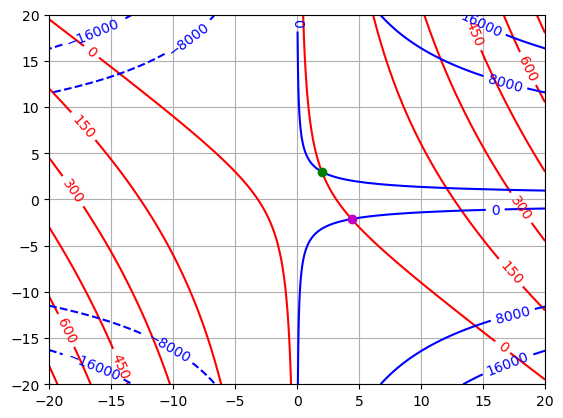

In [19]:
ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()
plt.plot(x_sol1, y_sol1, 'go', label='Solution 1')
plt.plot(x_sol2, y_sol2, 'mo', label='Solution 2')

Using Library

In [25]:
from scipy.optimize import fsolve

def system(vars):
    x, y = vars
    return [u(x, y), v(x, y)]

def u(x, y):
    return x**2 + x*y - 10
def v(x, y):
    return y + 3*x*y**2 - 57

# Initial guess
x0, y0 = 4.0, 2.0

# Solve system
x_sol, y_sol = fsolve(system, [x0, y0])

print(f"Solution: x = {x_sol:.6f}, y = {y_sol:.6f}")


Solution: x = 2.000000, y = 3.000000


### Real World Examples of Nonlinear Systems

1. **Chemical Reaction Equilibrium**

    In a reactor, the concentrations of chemicals \(A\) and \(B\) are governed by nonlinear equilibrium equations:
    $$
    \begin{align*}
    k_1 [A]^2 + k_2 [A][B] &= C_1 \\
    k_3 [B]^2 + k_4 [A][B] &= C_2
    \end{align*}
    $$
    Here, \([A]\) and \([B]\) are concentrations, and \(k_1, k_2, k_3, k_4, C_1, C_2\) are constants.

2. **Robot Arm Inverse Kinematics**

    For a 2-link robot arm:
    $$
    \begin{align*}
    x_T &= L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2) \\
    y_T &= L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2)
    \end{align*}
    $$
    Given target position \((x_T, y_T)\), solve for joint angles \((\theta_1, \theta_2)\).

4. **Economic Market Equilibrium**

    Supply and demand curves are nonlinear:
    $$
    \begin{align*}
    Q_s &= aP^2 + bP + c \\
    Q_d &= d\ln(P) + e
    \end{align*}
    $$
    Find price \(P\) and quantity \(Q\) such that \(Q_s = Q_d\).

5. **Population Dynamics (Predator-Prey Model)**

    The steady-state populations \(x\) (prey) and \(y\) (predator) satisfy:
    $$
    \begin{align*}
    0 &= ax - bxy \\
    0 &= -cy + dxy
    \end{align*}
    $$
    Where \(a, b, c, d\) are model parameters.